In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Potato_Disease_Classification/Training/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 0 1 0 0 0 1 2 0 1 1 0 0 2 0 1 2 1 1 0 1 0 0 0 1 0 1 0 0]


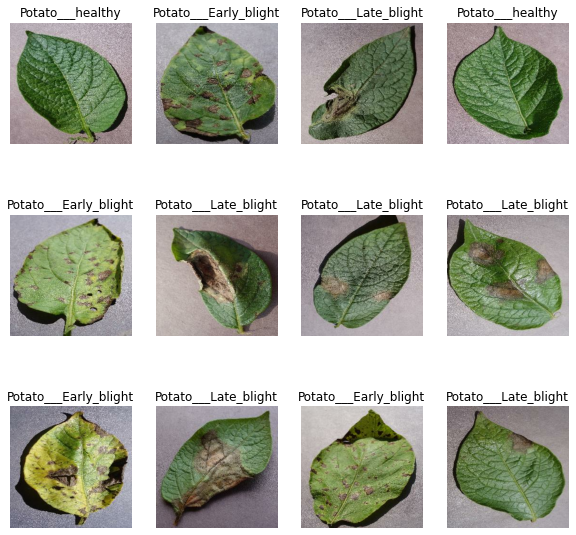

In [7]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

In [ ]:
80% ==> Training
10% ==> Validation
10% ==> Test

SyntaxError: ignored

In [8]:
len(dataset)

68

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partition_tf(ds, train_split= 0.8, val_split=0.1, test_split = 0.1, shuffle=True, shuffle_size=10000):
  assert(train_split+test_split+val_split) == 1


  ds_size = len(ds)


  if shuffle:
    ds = ds.shuffle(shuffle_size, seed =12)


  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)
  
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)



  return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch[0].numpy())

[[[205. 204. 210.]
  [201. 200. 206.]
  [197. 196. 202.]
  ...
  [184. 182. 196.]
  [188. 186. 200.]
  [192. 190. 204.]]

 [[206. 205. 211.]
  [203. 202. 208.]
  [199. 198. 204.]
  ...
  [180. 178. 192.]
  [182. 180. 194.]
  [184. 182. 196.]]

 [[207. 206. 212.]
  [204. 203. 209.]
  [200. 199. 205.]
  ...
  [178. 176. 189.]
  [178. 176. 189.]
  [180. 178. 191.]]

 ...

 [[165. 160. 167.]
  [164. 159. 166.]
  [166. 161. 168.]
  ...
  [161. 158. 169.]
  [157. 154. 165.]
  [148. 145. 156.]]

 [[158. 153. 160.]
  [160. 155. 162.]
  [160. 155. 162.]
  ...
  [172. 169. 180.]
  [172. 169. 180.]
  [165. 162. 173.]]

 [[169. 164. 171.]
  [170. 165. 172.]
  [166. 161. 168.]
  ...
  [150. 147. 158.]
  [145. 142. 153.]
  [138. 135. 146.]]]


In [22]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch[0].numpy().shape)

(256, 256, 3)


In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_7 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs = EPOCHS
)

Epoch 1/50
54/54 [==============================] - 216s 152ms/step - loss: 0.9070 - accuracy: 0.4809 - val_loss: 0.9517 - val_accuracy: 0.4740
Epoch 2/50
54/54 [==============================] - 4s 73ms/step - loss: 0.7294 - accuracy: 0.6690 - val_loss: 0.6528 - val_accuracy: 0.6979
Epoch 3/50
54/54 [==============================] - 4s 73ms/step - loss: 0.5333 - accuracy: 0.7801 - val_loss: 0.4772 - val_accuracy: 0.7552
Epoch 4/50
54/54 [==============================] - 4s 72ms/step - loss: 0.3496 - accuracy: 0.8709 - val_loss: 0.2963 - val_accuracy: 0.8802
Epoch 5/50
54/54 [==============================] - 4s 73ms/step - loss: 0.2669 - accuracy: 0.8866 - val_loss: 0.2653 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 4s 72ms/step - loss: 0.2382 - accuracy: 0.9155 - val_loss: 0.2931 - val_accuracy: 0.8854
Epoch 7/50
54/54 [==============================] - 4s 72ms/step - loss: 0.2037 - accuracy: 0.9149 - val_loss: 0.1256 - val_accuracy: 0.9635
Epoch 8/50

In [30]:
len(test_ds)

8

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 32ms/step - loss: 0.0636 - accuracy: 0.9766


In [32]:
scores

[0.06361974775791168, 0.9765625]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
history.history['loss']

[0.9070287346839905,
 0.7294261455535889,
 0.5333106517791748,
 0.34956851601600647,
 0.26693180203437805,
 0.238160640001297,
 0.20367492735385895,
 0.18084444105625153,
 0.17955271899700165,
 0.11355803906917572,
 0.11005381494760513,
 0.08538226783275604,
 0.08855299651622772,
 0.08502821624279022,
 0.07933735102415085,
 0.07806634902954102,
 0.05391368642449379,
 0.09272398054599762,
 0.08921145647764206,
 0.038607947528362274,
 0.06179968640208244,
 0.06029946729540825,
 0.03973471745848656,
 0.06101973354816437,
 0.06077845022082329,
 0.05620971694588661,
 0.03388465195894241,
 0.04451129212975502,
 0.04649718478322029,
 0.06869678199291229,
 0.03043561801314354,
 0.027219021692872047,
 0.04521295428276062,
 0.03395817056298256,
 0.03372595086693764,
 0.05077992379665375,
 0.030439672991633415,
 0.023639189079403877,
 0.03353441506624222,
 0.03184589371085167,
 0.03844413533806801,
 0.021453754976391792,
 0.019683798775076866,
 0.019402001053094864,
 0.01425699982792139,
 0.01817

In [37]:
len(history.history['loss'])

50

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location ' lower right '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location ' upper right '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


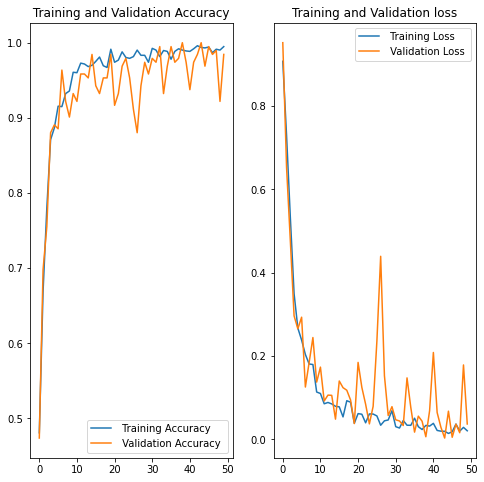

In [39]:
plt.figure ( figsize = ( 8 , 8 ) )
plt.subplot ( 1, 2 , 1 )
plt.plot ( range ( EPOCHS ) , acc , label = ' Training Accuracy ' )
plt.plot ( range ( EPOCHS ) , val_acc , label = ' Validation Accuracy ' )
plt.legend ( loc = ' lower right ' )
plt.title ( ' Training and Validation Accuracy ' )
plt.subplot ( 1 , 2 , 2 )
plt.plot ( range ( EPOCHS ) , loss , label = ' Training Loss ' )
plt.plot ( range ( EPOCHS ) , val_loss , label = ' Validation Loss ' )
plt.legend ( loc = ' upper right ' )
plt.title('Training and Validation loss')
plt.show()

 First image to predict 
Actual Label :  Potato___Late_blight
Predicted Label :  Potato___Late_blight


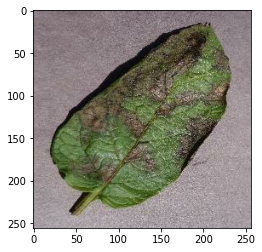

In [40]:
import numpy as np
for image_batch, labels_batch in dataset.take(1):
  first_image = image_batch[0].numpy().astype("uint8")
  
  print ( " First image to predict " )
  plt.imshow ( first_image )
  print ( "Actual Label : " , class_names[labels_batch[0].numpy()])
  batch_prediction = model.predict ( image_batch )
  print ("Predicted Label : " ,class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict ( model , img ) :
    img_array = tf.keras.preprocessing.image.img_to_array ( images [ i ] .numpy ( ) )
    img_array = tf.expand_dims ( img_array , 0 ) # Create a batch
    predictions = model.predict ( img_array )
    predicted_class = class_names [ np.argmax ( predictions [ 0 ] ) ]
    confidence = round ( 100 * ( np.max ( predictions [ 0 ] ) ) , 2 )
    return predicted_class , confidence

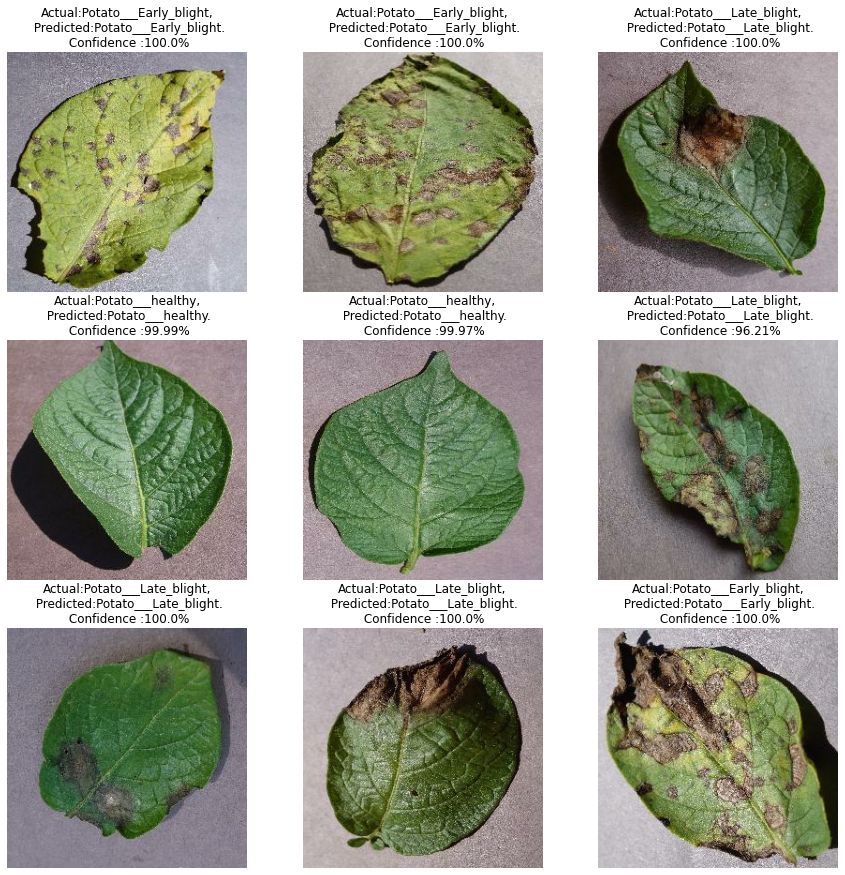

In [42]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take ( 1 ) :
  for i in range ( 9 ) :
    ax = plt.subplot ( 3 , 3 , i + 1 )
    plt.imshow (images[i].numpy().astype( "uint8"))
    predicted_class , confidence = predict ( model , images [ i ] .numpy ( ) )
    actual_class = class_names [ labels [ i ] ]
    plt.title (f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence :{confidence}%")
    plt.axis ( "off" )

In [43]:
import os
model_version = max([int(i) for i in (os.listdir("/content/gdrive/MyDrive/Potato_Disease_Classification/Models/")+[0])])+1
model.save(f"/content/gdrive/MyDrive/Potato_Disease_Classification/Models/{model_version}")

In [ ]:
model_version = 1
model.save(f"/content/gdrive/MyDrive/Potato_Disease_Classification/Models/{model_version}")